# Lab | Text Generation from Shakespeare's Sonnet

This notebook explores the fascinating domain of text generation using a deep learning model trained on Shakespeare's sonnets.

The objective is to create a neural network capable of generating text sequences that mimic the style and language of Shakespeare.

By utilizing a Recurrent Neural Network (RNN) with Long Short-Term Memory (LSTM) layers, this project aims to demonstrate how a model can learn and replicate the complex patterns of early modern English.

The dataset used consists of Shakespeare's sonnets, which are preprocessed and tokenized to serve as input for the model.

Throughout this notebook, you will see the steps taken to prepare the data, build and train the model, and evaluate its performance in generating text.

This lab provides a hands-on approach to understanding the intricacies of natural language processing (NLP) and the potential of machine learning in creative text generation.

Let's import necessary libraries

In [4]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
import numpy as np

Let's get the data!

In [5]:
import requests
url = 'https://raw.githubusercontent.com/martin-gorner/tensorflow-rnn-shakespeare/master/shakespeare/sonnets.txt'
resp = requests.get(url)
with open('sonnets.txt', 'wb') as f:
    f.write(resp.content)

data = open('sonnets.txt').read()

corpus = data.lower().split("\n")

Step 1: Initialise a tokenizer and fit it on the corpus variable using .fit_on_texts

In [10]:
# Your code here :

# Import Tokenizer
from tensorflow.keras.preprocessing.text import Tokenizer

# Initialize the tokenizer
tokenizer = Tokenizer()

# Fit the tokenizer on the corpus
tokenizer.fit_on_texts(corpus)

# (Optional) Check the vocabulary size
total_words = len(tokenizer.word_index) + 1
print(f"Total unique words: {total_words}")

# (Optional) Preview some of the token mappings
print(list(tokenizer.word_index.items())[:10])

Total unique words: 3375
[('and', 1), ('the', 2), ('to', 3), ('of', 4), ('my', 5), ('i', 6), ('in', 7), ('that', 8), ('thy', 9), ('thou', 10)]


Step 2: Calculate the Vocabulary Size

Let's figure out how many unique words are in your corpus. This will be the size of your vocabulary.

Calculate the length of tokenizer.word_index, add 1 to it and store it in a variable called total_words.

In [12]:
# Your code here :
# Step 2: Calculate the vocabulary size

total_words = len(tokenizer.word_index) + 1  # +1 because indexing starts at 1

print(f"Total unique words (vocabulary size): {total_words}")


Total unique words (vocabulary size): 3375


Create an empty list called input_sequences.

For each sentence in your corpus, convert the text into a sequence of integers using the tokenizer.
Then, generate n-gram sequences from these tokens.

Store the result in the list input_sequences.

In [14]:
# Your code here :

input_sequences = []  # empty list to store all sequences

for line in corpus:
    # Convert each line of text into a list of tokens (integers)
    token_list = tokenizer.texts_to_sequences([line])[0]

    # Generate n-gram sequences
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Check a few examples
print(input_sequences[:5])
print(f"Total sequences created: {len(input_sequences)}")


[[3, 2], [3, 2, 313], [3, 2, 313, 1375], [3, 2, 313, 1375, 4], [118, 1376]]
Total sequences created: 15484


Calculate the length of the longest sequence in input_sequences. Assign the result to a variable called max_sequence_len.

Now pad the sequences using pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre').
Convert it to a numpy array and assign the result back to our variable called input_sequences.

In [15]:
# Your code here :

from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

# Find the length of the longest sequence
max_sequence_len = max([len(seq) for seq in input_sequences])
print("Maximum sequence length:", max_sequence_len)

# Pad all sequences to the same length
input_sequences = np.array(
    pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre')
)

# Check the shape of your resulting array
print("Shape of input_sequences:", input_sequences.shape)


Maximum sequence length: 11
Shape of input_sequences: (15484, 11)


Prepare Predictors and Labels

Split the sequences into two parts:

- Predictors: All elements from input_sequences except the last one.
- Labels: The last element of each sequence in input_sequences.

In [16]:
# Your code here :

# Predictors: all tokens except the last one
X = input_sequences[:, :-1]

# Labels: the last token in each sequence
y = input_sequences[:, -1]

print("Shape of predictors (X):", X.shape)
print("Shape of labels (y):", y.shape)


Shape of predictors (X): (15484, 10)
Shape of labels (y): (15484,)


One-Hot Encode the Labels :

Convert the labels (which are integers) into one-hot encoded vectors.

Ensure the length of these vectors matches the total number of unique words in your vocabulary.

Use ku.to_categorical() on labels with num_classes = total_words

Assign the result back to our variable labels.

In [17]:
# Your code here :

# One-Hot Encode the labels
from tensorflow.keras.utils import to_categorical

# Convert labels (y) into one-hot encoded vectors
y = to_categorical(y, num_classes=total_words)

print("Shape of one-hot encoded labels (y):", y.shape)


Shape of one-hot encoded labels (y): (15484, 3375)


# Initialize the Model

Start by creating a Sequential model.

Add Layers to the Model:

Embedding Layer: The first layer is an embedding layer. It converts word indices into dense vectors of fixed size (100 in this case). Set the input length to the maximum sequence length minus one, which corresponds to the number of previous words the model will consider when predicting the next word.

Bidirectional LSTM Layer: Add a Bidirectional LSTM layer with 150 units. This layer allows the model to learn context from both directions (past and future) in the sequence. return_sequences=True

Dropout Layer: Add a dropout layer with a rate of 0.2 to prevent overfitting by randomly setting 20% of the input units to 0 during training.

LSTM Layer: Add a second LSTM layer with 100 units. This layer processes the sequence and passes its output to the next layer.

Dense Layer (Intermediate): Add a dense layer with half the total number of words as units, using ReLU activation. A regularization term (L2) is added to prevent overfitting.

Dense Layer (Output): The final dense layer has as many units as there are words in the vocabulary, with a softmax activation function to output a probability distribution over all words.

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras import regularizers

In [22]:
model = Sequential([

    # Your code here :

    # Embedding layer: converts word indices to dense vectors
    Embedding(input_dim=total_words,
              output_dim=100,
              input_length=max_sequence_len - 1),

    # Bidirectional LSTM: learns from both directions
    Bidirectional(LSTM(150, return_sequences=True)),

    # Dropout layer to reduce overfitting
    Dropout(0.2),

    # Second LSTM layer
    LSTM(100),

    # Dense layer (intermediate)
    Dense(total_words // 2,
          activation='relu',
          kernel_regularizer=regularizers.l2(0.01)),

    # Output layer: softmax for next-word prediction
    Dense(total_words, activation='softmax')
])




# Compile the Model:

Compile the model using categorical crossentropy as the loss function, the Adam optimizer for efficient training, and accuracy as the metric to evaluate during training.

In [23]:
# Your code here :
# Compile the model

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

print("✅ Model compiled successfully!")


✅ Model compiled successfully!


# Print Model Summary:

Use model.summary() to print a summary of the model, which shows the layers, their output shapes, and the number of parameters.

In [24]:
# Your code here :
# Summary of the model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

# Now train the model for 50 epochs and assign it to a variable called history.

Training the model with 50 epochs should get you around 40% accuracy.

You can train the model for as many epochs as you like depending on the time and computing constraints you are facing. Ideally train it for a larger amount of epochs than 50.

That way you will get better text generation at the end.

However, dont waste your time.

In [25]:
# Your code here :
# Train the model

history = model.fit(
    X,
    y,
    epochs=50,
    verbose=1
)

Epoch 1/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.0203 - loss: 7.3411
Epoch 2/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0206 - loss: 6.4662
Epoch 3/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0277 - loss: 6.3622
Epoch 4/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0278 - loss: 6.2702
Epoch 5/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0310 - loss: 6.1639
Epoch 6/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0383 - loss: 6.1057
Epoch 7/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0427 - loss: 6.0065
Epoch 8/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0433 - loss: 5.9414
Epoch 9/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0522 - loss: 5.8134
Epoch 10/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.0544 - loss: 5.7322
Epoch 11/50
484/484 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.0600 - loss: 5.5990
Epoch 12/50
484/484 ━━━━━━━━━━━━━━━━━━━━

# Use plt from matplotlib to plot the training accuracy over epochs and the loss over epochs

First you will have to get the accuracy and loss data over epochs, you can do this by using methods on your model.

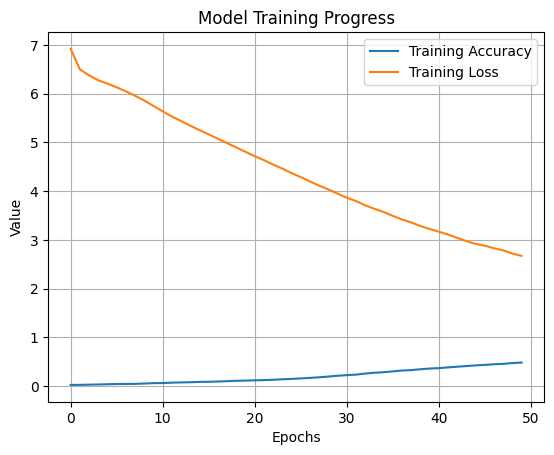

In [26]:
# Your code here :
# Plot training accuracy and loss over epochs

import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Model Training Progress')
plt.xlabel('Epochs')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Generate text with the model based on a seed text

Now you will create two variables :

- seed_text = 'Write the text you want the model to use as a starting point to generate the next words'
- next_words = number_of_words_you_want_the_model_to_generate

Please change number_of_words_you_want_the_model_to_generate by an actual integer.

In [29]:
# Your code here :
# Generate text with the model

import numpy as np

# Define the starting seed text and how many words to generate
seed_text = "Shall I compare thee to a summer's day"
next_words = 50  # choose how many words you want the model to generate

for _ in range(next_words):
    # Convert the current text into a sequence of integers
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence to match the model's input length
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

    # Predict the next word (returns probabilities)
    predicted_probs = model.predict(token_list, verbose=0)

    # Get the index of the most probable word
    predicted_index = np.argmax(predicted_probs, axis=-1)[0]

    # Map index back to word
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    # Append predicted word to the seed text
    seed_text += " " + output_word

# Print the generated text
print("\n📝 Generated Shakespearean Text:\n")
print(seed_text)



📝 Generated Shakespearean Text:

Shall I compare thee to a summer's day esteem dead lie to me thee swearing so told me told to dross men more idolatry dead mother confined ill live mute still days old broken express'd ' live slain so told me told to dross men more appear still still to me subscribes seen art days ' live remains


Now create a loop that runs based on the next_words variable and generates new text based on your seed_text input string. Print the full text with the generated text at the end.

This time you dont get detailed instructions.

Have fun!

In [30]:
# Your code here :
# Generate Shakespearean-style text in a loop

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define your seed text and number of words to generate
seed_text = "Shall I compare thee to a summer's day"
next_words = 50  # choose how many new words you want to generate

# Generate words one by one
for _ in range(next_words):
    # Convert the current seed text to a sequence of integers
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence to match the model input length
    token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')

    # Predict the next word (returns a probability distribution)
    predicted_probs = model.predict(token_list, verbose=0)

    # Choose the index of the word with the highest probability
    predicted_index = np.argmax(predicted_probs, axis=-1)[0]

    # Find the corresponding word from the tokenizer
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted_index:
            output_word = word
            break

    # Append the predicted word to the seed text
    seed_text += " " + output_word

# Print the final generated text
print("\n📝 Generated Shakespearean Text:\n")
print(seed_text)



📝 Generated Shakespearean Text:

Shall I compare thee to a summer's day esteem dead lie to me thee swearing so told me told to dross men more idolatry dead mother confined ill live mute still days old broken express'd ' live slain so told me told to dross men more appear still still to me subscribes seen art days ' live remains


Experiment with at least 3 different seed_text strings and see what happens!

In [31]:
# Your code here :
# Experiment with different seed texts

seed_texts = [
    "O gentle night",
    "Love looks not with the eyes",
    "When in disgrace with fortune and men’s eyes"
]

next_words = 30  # you can change this number for longer or shorter text

for i, seed_text in enumerate(seed_texts, start=1):
    print(f"\n🌟 Generated Text {i} — Seed: \"{seed_text}\"\n")

    # Start from the given seed text
    text = seed_text

    # Generate new words
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len - 1, padding='pre')
        predicted_probs = model.predict(token_list, verbose=0)
        predicted_index = np.argmax(predicted_probs, axis=-1)[0]

        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted_index:
                output_word = word
                break

        text += " " + output_word

    print(text)
    print("-" * 80)



🌟 Generated Text 1 — Seed: "O gentle night"

O gentle night when my love and no brow pride pride spent spent ' live forth so great foes stand slain mother appear mother hate eyes ' live forth so green me more
--------------------------------------------------------------------------------

🌟 Generated Text 2 — Seed: "Love looks not with the eyes"

Love looks not with the eyes is please them told to dross thine told of men ' live in your feature face face still now dead lie so new told from men more rare still is
--------------------------------------------------------------------------------

🌟 Generated Text 3 — Seed: "When in disgrace with fortune and men’s eyes"

When in disgrace with fortune and men’s eyes shall sing heir age lies new green life hate days ' live behind old face tongue bright days days tongue shall say best so green me bright so green me
--------------------------------------------------------------------------------
